In [58]:
from collections import defaultdict, deque
from Queue import PriorityQueue
from igraph import Graph as PlottableGraph, plot, layout, Plot

In [94]:
class Graph(object):
    def __init__(self):
        self.adj = defaultdict(lambda: [])
        self.nodes = set()
        
    def add_edge(self, a, b, weight):
        self.adj[a].append((b, weight))
        self.nodes.add(a)
        self.nodes.add(b)

    def draw(self):
        graph = PlottableGraph(directed=True)
        figure = Plot(bbox=(400, 400))
        for name in self.nodes:
            graph.add_vertex(name=name, label=name)
        for name, neighbors in self.adj.items():
            for (neighbor, weight) in neighbors:
                graph.add_edge(name, neighbor, color="black", weight=weight, label=str(weight))
                                    
        figure.add(graph, layout=graph.layout("kk"), margin = 100,
                          vertex_label_dist=1)
        return figure

In [95]:
g = Graph()
g.add_edge("A","B", 2)
g.add_edge("A","C", 3)
g.add_edge("B","D", 4)
g.add_edge("C","D", 1)
g.add_edge("D","A", 1)

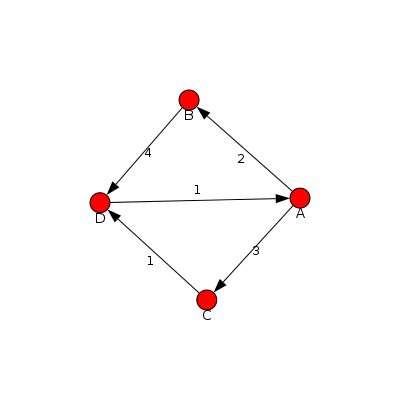

In [96]:
g.draw()

# Dijkstra's algorithm

In [97]:
def dijkstra(graph, source):
    # set of already explored nodes (S from lectures)
    visited   = set()
    # distance from source
    distance = defaultdict(lambda: float('inf'))
    # predecessor on the shortest path from source
    predecessor = defaultdict(lambda: None)
    # queue of tuples (distance, node). 
    # returns shortest distance first
    q = PriorityQueue()
    
    # add source to the state
    distance[source] = 0
    q.put((0,source))

    # while there are still nodes in the queue
    while not q.empty():
        _, node = q.get()
        # check that we did not already process this node
        # (nodes can be inserted to the queue multiple times)
        if node in visited:
            continue
        # mark as visited
        visited.add(node)
        
        # for every neighbor
        for neighbor, edge_len in graph.adj[node]:
            # can we relax the edge?
            if distance[neighbor] > distance[node] + edge_len:
                # store updated distance
                distance[neighbor] = distance[node] + edge_len
                # add edge to the queue (maybe again...)
                q.put((distance[neighbor], neighbor))
                # store predecessor
                predecessor[neighbor] = node

    return distance, predecessor

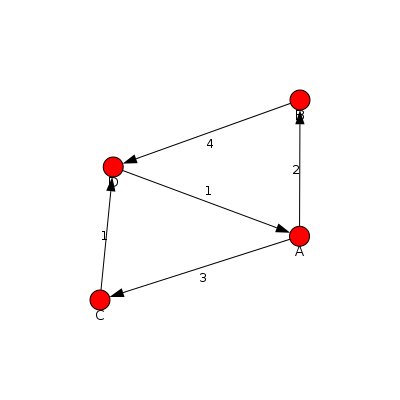

In [98]:
g.draw()

In [99]:
dijkstra(g, "A")

(defaultdict(<function __main__.<lambda>>, {'A': 0, 'B': 2, 'C': 3, 'D': 4}),
 defaultdict(<function __main__.<lambda>>, {'B': 'A', 'C': 'A', 'D': 'C'}))

# Negative edge example

In [100]:
g = Graph()
g.add_edge("A","B", 2)
g.add_edge("A","C", 3)
g.add_edge("B","D", 3)
g.add_edge("D","C", 4)
g.add_edge("C","B", -2)

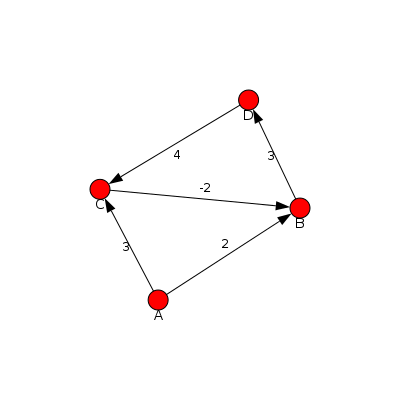

In [101]:
g.draw()